In [6]:
import pandas as pd
pd.options.display.max_columns = None # 显示所有列

In [7]:
# Read .csv
origin_data = pd.read_csv('duct.csv')
print(origin_data.shape)
origin_data.head()

(355, 46)


,malignant,bilateral,age,month,height,weight,bmi,diabetes,hypertension,surgery,smoking,famhis2,family,menarche,mensperiod,menopause,menregular,miscarriage,pregnancy,childbearing,disnature,dischange,disnumber,intraductalmass,position,distance,shape,surface,status,quantity,distribution,retraction,appearance,ductectasia,numintramass,numcysmass,nummass,ussize,usposition,usdistance,usshape,usboundary,bloodflow,bloodflow2,calcification,birads
0,1,0,32,18.00,167,78,28.0,0,0,0,0,2,0,13,5,0,1,0,1,1,1,0,0,1,2,2,1,1,2,1,1,0,0,1,0,0,1,3,2,1,2,1,1,1,0,1
1,1,1,42,7.00,156,57,23.4,0,1,1,0,0,0,14,4,0,0,2,3,1,2,0,1,1,6,2,1,1,0,2,2,0,0,1,0,0,2,1,1,1,1,1,1,1,0,1
2,1,0,61,0.75,163,65,24.5,0,0,0,1,0,0,17,5,1,0,2,4,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,2,3,1,1,2,2,2,3,0,2
3,1,0,39,6.00,160,65,25.4,0,0,0,0,3,0,16,6,0,0,1,2,1,1,1,0,1,3,1,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,1,0,69,0.50,156,67,27.5,1,1,0,0,0,0,13,4,1,0,0,1,1,1,0,0,1,2,2,1,1,0,1,1,0,0,1,1,0,2,1,5,1,1,1,1,1,0,2


In [8]:
# Preprocessing Data

data = pd.DataFrame()

colnames = origin_data.columns # 保存原始列顺序


# 临床资料
data[['malignant','bilateral','height','weight','bmi']] = origin_data[['malignant','bilateral','height','weight','bmi']]

data[['diabetes','hypertension','surgery','smoking','family']] = origin_data[['diabetes','hypertension','surgery','smoking','family']]

data[['menarche','menopause','miscarriage','pregnancy','childbearing']] = origin_data[['menarche','menopause','miscarriage','pregnancy','childbearing']]

data[['famhis2','mensperiod','menregular']] = origin_data[['famhis2','mensperiod','menregular']]

data['age'] = pd.cut(origin_data['age'], [0,35,50,100], right=False, labels=[0,1,2]).astype('int64') # 0-34=0, 35-49=1,50-100=2

data['month'] = pd.cut(origin_data['month'], [0,6,350], right=False, labels=[0,1]).astype('int64') # 0-6=0, 6-max=1

# 乳管镜

data['disnature'] = [x if x!=4 else 0 for x in origin_data['disnature']] # 混合性 4 变为 0 

data[['dischange','disnumber']] = origin_data[['dischange','disnumber']]

data[['intraductalmass','position','distance']] = origin_data[['intraductalmass','position','distance']]

data[['shape','surface','status','quantity','distribution']] = origin_data[['shape','surface','status','quantity','distribution']]

data[['appearance','retraction']] = origin_data[['appearance','retraction']]

# 超声表现

data[['ductectasia','numintramass','numcysmass','nummass']] = origin_data[['ductectasia','numintramass','numcysmass','nummass']]

data[['ussize','usposition','usdistance','usshape','usboundary']] = origin_data[['ussize','usposition','usdistance','usshape','usboundary']] # 有怀疑的，按着分级最高，最怀疑的肿物来的。不怀疑的，是按着最大的来的。

data[['bloodflow','calcification','birads']] = origin_data[['bloodflow','calcification','birads']]

data['bloodflow2'] = origin_data['bloodflow2'] # 拟删除列

data = data[colnames] # 原始列顺序

data.drop(['famhis2','bloodflow2'], axis=1, inplace=True) # 删除无意义列

print(data.shape)

data.head()

(355, 44)


,malignant,bilateral,age,month,height,weight,bmi,diabetes,hypertension,surgery,smoking,family,menarche,mensperiod,menopause,menregular,miscarriage,pregnancy,childbearing,disnature,dischange,disnumber,intraductalmass,position,distance,shape,surface,status,quantity,distribution,retraction,appearance,ductectasia,numintramass,numcysmass,nummass,ussize,usposition,usdistance,usshape,usboundary,bloodflow,calcification,birads
0,1,0,0,1,167,78,28.0,0,0,0,0,0,13,5,0,1,0,1,1,1,0,0,1,2,2,1,1,2,1,1,0,0,1,0,0,1,3,2,1,2,1,1,0,1
1,1,1,1,1,156,57,23.4,0,1,1,0,0,14,4,0,0,2,3,1,2,0,1,1,6,2,1,1,0,2,2,0,0,1,0,0,2,1,1,1,1,1,1,0,1
2,1,0,2,0,163,65,24.5,0,0,0,1,0,17,5,1,0,2,4,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,2,3,1,1,2,2,2,0,2
3,1,0,1,1,160,65,25.4,0,0,0,0,0,16,6,0,0,1,2,1,1,1,0,1,3,1,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,1,0,2,0,156,67,27.5,1,1,0,0,0,13,4,1,0,0,1,1,1,0,0,1,2,2,1,1,0,1,1,0,0,1,1,0,2,1,5,1,1,1,1,0,2


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355 entries, 0 to 354
Data columns (total 44 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   malignant        355 non-null    int64  
 1   bilateral        355 non-null    int64  
 2   age              355 non-null    int64  
 3   month            355 non-null    int64  
 4   height           355 non-null    int64  
 5   weight           355 non-null    int64  
 6   bmi              355 non-null    float64
 7   diabetes         355 non-null    int64  
 8   hypertension     355 non-null    int64  
 9   surgery          355 non-null    int64  
 10  smoking          355 non-null    int64  
 11  family           355 non-null    int64  
 12  menarche         355 non-null    int64  
 13  mensperiod       355 non-null    int64  
 14  menopause        355 non-null    int64  
 15  menregular       355 non-null    int64  
 16  miscarriage      355 non-null    int64  
 17  pregnancy       

In [11]:
from pycaret.classification import *
model = setup(data=data, target = 'malignant', train_size=0.85)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,1312
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(355, 44)"
4,Missing Values,False
5,Numeric Features,3
6,Categorical Features,40
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [12]:
# comparing all models
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Extra Trees Classifier,0.830500,0.785300,0.481900,0.822900,0.592400,0.498600
1,CatBoost Classifier,0.814100,0.799400,0.434700,0.821300,0.539300,0.442800
2,Light Gradient Boosting Machine,0.804200,0.757800,0.459700,0.715300,0.546600,0.434300
3,Gradient Boosting Classifier,0.800800,0.761900,0.458300,0.723100,0.543000,0.428600
4,Ridge Classifier,0.797300,0.000000,0.469400,0.722900,0.539200,0.422500
5,Logistic Regression,0.790800,0.743900,0.455600,0.646100,0.526600,0.401400
6,Extreme Gradient Boosting,0.784300,0.761800,0.434700,0.653600,0.507900,0.382800
7,Linear Discriminant Analysis,0.783900,0.725100,0.480600,0.684400,0.535500,0.404700
8,Random Forest Classifier,0.780600,0.741600,0.308300,0.638300,0.408100,0.310000
9,Ada Boost Classifier,0.757400,0.714100,0.469400,0.565000,0.508700,0.350800


In [13]:
catboost = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7742,0.7778,0.2222,1.0000,0.3636,0.2885
1,0.7667,0.7045,0.5000,0.5714,0.5333,0.3787
2,0.7667,0.8125,0.2500,0.6667,0.3636,0.2553
3,0.8000,0.7386,0.6250,0.6250,0.6250,0.4886
4,0.9667,0.9886,0.8750,1.0000,0.9333,0.9112
5,0.8667,0.9432,0.5000,1.0000,0.6667,0.5946
6,0.8000,0.8011,0.3750,0.7500,0.5000,0.3919
7,0.7667,0.7273,0.3750,0.6000,0.4615,0.3226
8,0.8000,0.6193,0.2500,1.0000,0.4000,0.3284
9,0.8333,0.8807,0.3750,1.0000,0.5455,0.4681


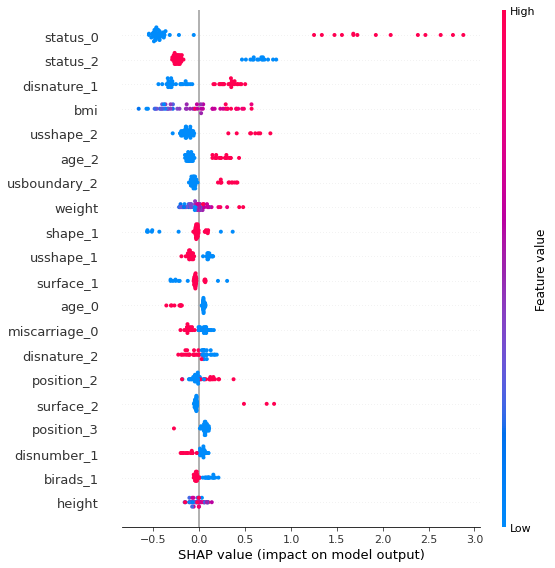

In [14]:
interpret_model(catboost)

In [15]:
pred_holdout = predict_model(catboost)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,CatBoost Classifier,0.8704,0.8906,0.5333,1.0,0.6957,0.6228


In [16]:
from pycaret.clustering import *
clusterdata = setup(data, normalize = True)


Setup Succesfully Completed!


,Description,Value
0,session_id,7986
1,Original Data,"(355, 44)"
2,Missing Values,False
3,Numeric Features,3
4,Categorical Features,41
5,Ordinal Features,False
6,High Cardinality Features,False
7,Transformed Data,"(355, 145)"
8,Numeric Imputer,mean
9,Categorical Imputer,constant


In [28]:
kmeans = create_model('kmeans', num_clusters = 4)
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=7986, tol=0.0001, verbose=0)


In [29]:
kmean_results = assign_model(kmeans)
kmean_results.head()

,malignant,bilateral,age,month,height,weight,bmi,diabetes,hypertension,surgery,...,nummass,ussize,usposition,usdistance,usshape,usboundary,bloodflow,calcification,birads,Cluster
0,1,0,0,1,167,78,28.0,0,0,0,...,1,3,2,1,2,1,1,0,1,Cluster 1
1,1,1,1,1,156,57,23.4,0,1,1,...,2,1,1,1,1,1,1,0,1,Cluster 0
2,1,0,2,0,163,65,24.5,0,0,0,...,2,3,1,1,2,2,2,0,2,Cluster 3
3,1,0,1,1,160,65,25.4,0,0,0,...,0,0,0,0,0,0,0,0,1,Cluster 2
4,1,0,2,0,156,67,27.5,1,1,0,...,2,1,5,1,1,1,1,0,2,Cluster 1


In [30]:
plot_model(kmeans)

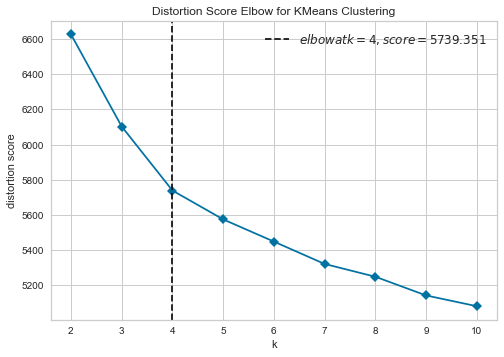

In [31]:
plot_model(kmeans, plot = 'elbow')

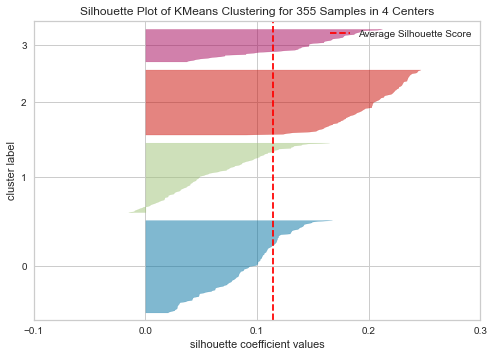

In [32]:
plot_model(kmeans, plot = 'silhouette')

In [33]:
plot_model(kmeans, plot = 'distribution')

In [34]:
plot_model(kmeans, plot = 'distribution', feature = 'malignant')

In [48]:
kerasdata = pd.DataFrame()
kerasdata[['malignant','height','weight','bmi','menarche','mensperiod','miscarriage', 'pregnancy',
       'childbearing']] = data[['malignant','height','weight','bmi','menarche','mensperiod','miscarriage', 'pregnancy',
       'childbearing']]
kerasdata[['bilateral','diabetes','hypertension', 'surgery', 'smoking', 'family', 'menopause', 'menregular','dischange', 'disnumber','intraductalmass','distance','ductectasia','calcification']] = data[['bilateral','diabetes','hypertension', 'surgery', 'smoking', 'family', 'menopause', 'menregular','dischange', 'disnumber','intraductalmass','distance','ductectasia','calcification']]

classname = ['disnature', 'position',  'shape', 'surface', 'status', 'quantity',  'appearance', 'numintramass', 'numcysmass', 
             'nummass', 'ussize', 'usposition', 'usdistance', 'usshape', 'usboundary', 'bloodflow', 'birads']

In [49]:
for colname in data.columns:
    if colname not in classname:
        df = pd.get_dummies(data[colname])
        df.columns = [colname + '-' + str(name) for name in df.columns ]
        kerasdata = pd.concat([kerasdata,df],axis = 1)
kerasdata

,malignant,height,weight,bmi,menarche,mensperiod,miscarriage,pregnancy,childbearing,bilateral,...,distance-2,distribution-0,distribution-1,distribution-2,retraction-0,retraction-1,ductectasia-0,ductectasia-1,calcification-0,calcification-1
0,1,167,78,28.0,13,5,0,1,1,0,...,1,0,1,0,1,0,0,1,1,0
1,1,156,57,23.4,14,4,2,3,1,1,...,1,0,0,1,1,0,0,1,1,0
2,1,163,65,24.5,17,5,2,4,2,0,...,0,1,0,0,1,0,0,1,1,0
3,1,160,65,25.4,16,6,1,2,1,0,...,0,0,1,0,1,0,0,1,1,0
4,1,156,67,27.5,13,4,0,1,1,0,...,1,0,1,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,0,154,52,21.9,15,6,0,1,1,0,...,0,0,1,0,1,0,0,1,1,0
351,0,155,60,25.0,15,4,0,1,1,1,...,0,1,0,0,1,0,1,0,1,0
352,0,155,60,25.0,15,4,0,1,1,1,...,1,0,1,0,1,0,1,0,1,0
353,0,163,60,22.6,15,7,0,1,1,0,...,0,0,1,0,1,0,0,1,1,0


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
seed = 42
testsize = 0.1
kfold = StratifiedKFold(n_splits=10, random_state =seed, shuffle=True)
X, y = kerasdata.values[:,1:], kerasdata.values[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testsize, random_state=seed)

In [59]:
X_train.shape

(319, 291)

In [60]:
from keras import models,layers

model = models.Sequential()
model.add(layers.Dense(28,activation = 'relu',input_shape=(291,)))
model.add(layers.Dense(28,activation = 'relu' ))
# model.add(layers.Dense(30,activation = 'relu' ))
# model.add(layers.Dense(10,activation = 'relu' ))
# model.add(layers.Dense(10,activation = 'relu' ))
# model.add(layers.Dense(10,activation = 'relu' ))
# model.add(layers.Dense(10,activation = 'relu' ))
model.add(layers.Dense(1,activation = 'sigmoid' ))

# 二分类问题选择二元交叉熵损失函数
model.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 28)                8176      
_________________________________________________________________
dense_5 (Dense)              (None, 28)                812       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 29        
Total params: 9,017
Trainable params: 9,017
Non-trainable params: 0
_________________________________________________________________


In [61]:
history = model.fit(X_train,y_train,
                    batch_size= 64,
                    epochs= 150,
                    validation_split=0.2 #分割一部分训练数据用于验证
                   )

Train on 255 samples, validate on 64 samples
Epoch 1/150
255/255 [==============================] - 0s 485us/step - loss: 0.9455 - accuracy: 0.5176 - val_loss: 0.8948 - val_accuracy: 0.7188
Epoch 2/150
255/255 [==============================] - 0s 35us/step - loss: 0.8933 - accuracy: 0.7333 - val_loss: 0.9793 - val_accuracy: 0.7188
Epoch 3/150
255/255 [==============================] - 0s 35us/step - loss: 0.7232 - accuracy: 0.7333 - val_loss: 0.6742 - val_accuracy: 0.7031
Epoch 4/150
255/255 [==============================] - 0s 51us/step - loss: 0.6544 - accuracy: 0.6353 - val_loss: 0.7356 - val_accuracy: 0.4688
Epoch 5/150
255/255 [==============================] - 0s 47us/step - loss: 0.6634 - accuracy: 0.5569 - val_loss: 0.6394 - val_accuracy: 0.7031
Epoch 6/150
255/255 [==============================] - 0s 43us/step - loss: 0.5989 - accuracy: 0.7294 - val_loss: 0.7116 - val_accuracy: 0.7188
Epoch 7/150
255/255 [==============================] - 0s 43us/step - loss: 0.6199 - accur

255/255 [==============================] - 0s 43us/step - loss: 0.1634 - accuracy: 0.9725 - val_loss: 0.3576 - val_accuracy: 0.8281
Epoch 58/150
255/255 [==============================] - 0s 43us/step - loss: 0.1573 - accuracy: 0.9843 - val_loss: 0.3528 - val_accuracy: 0.8438
Epoch 59/150
255/255 [==============================] - 0s 35us/step - loss: 0.1469 - accuracy: 0.9922 - val_loss: 0.3385 - val_accuracy: 0.8906
Epoch 60/150
255/255 [==============================] - 0s 35us/step - loss: 0.1488 - accuracy: 0.9686 - val_loss: 0.3329 - val_accuracy: 0.8750
Epoch 61/150
255/255 [==============================] - 0s 27us/step - loss: 0.1369 - accuracy: 0.9961 - val_loss: 0.3287 - val_accuracy: 0.8750
Epoch 62/150
255/255 [==============================] - 0s 39us/step - loss: 0.1235 - accuracy: 0.9843 - val_loss: 0.3207 - val_accuracy: 0.8594
Epoch 63/150
255/255 [==============================] - 0s 35us/step - loss: 0.1161 - accuracy: 0.9961 - val_loss: 0.3034 - val_accuracy: 0.906

255/255 [==============================] - 0s 31us/step - loss: 0.0166 - accuracy: 1.0000 - val_loss: 0.1441 - val_accuracy: 0.9531
Epoch 114/150
255/255 [==============================] - 0s 31us/step - loss: 0.0159 - accuracy: 1.0000 - val_loss: 0.1510 - val_accuracy: 0.9531
Epoch 115/150
255/255 [==============================] - 0s 39us/step - loss: 0.0156 - accuracy: 1.0000 - val_loss: 0.1426 - val_accuracy: 0.9531
Epoch 116/150
255/255 [==============================] - 0s 39us/step - loss: 0.0153 - accuracy: 1.0000 - val_loss: 0.1394 - val_accuracy: 0.9531
Epoch 117/150
255/255 [==============================] - 0s 31us/step - loss: 0.0146 - accuracy: 1.0000 - val_loss: 0.1486 - val_accuracy: 0.9531
Epoch 118/150
255/255 [==============================] - 0s 35us/step - loss: 0.0147 - accuracy: 1.0000 - val_loss: 0.1419 - val_accuracy: 0.9531
Epoch 119/150
255/255 [==============================] - 0s 28us/step - loss: 0.0139 - accuracy: 1.0000 - val_loss: 0.1330 - val_accuracy:

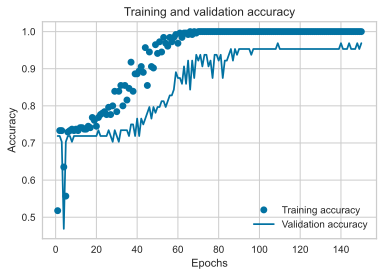

In [62]:
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [63]:
y_pred = model.predict_classes(X_test)

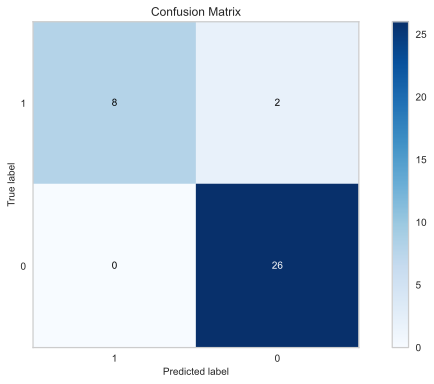

In [64]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False, labels=[1,0], figsize=(12,6));